In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
data = pd.read_csv('Salary.csv')
data

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [45]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [46]:
data.dtypes

YearsExperience    float64
Salary               int64
dtype: object

In [47]:
df = data.copy()
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [48]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

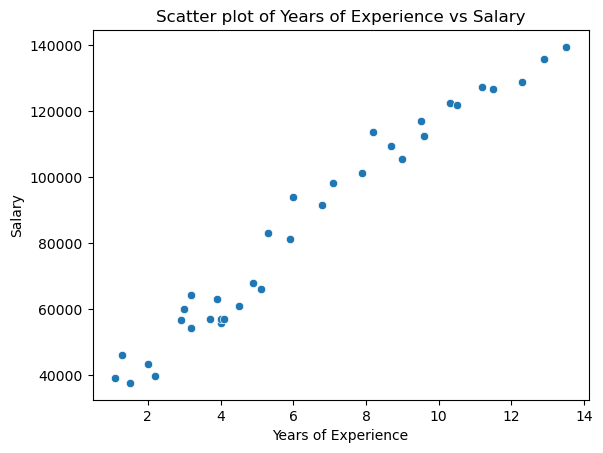

In [49]:
sns.scatterplot(data=df, x='YearsExperience', y='Salary')
plt.title('Scatter plot of Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.32, random_state=41)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred

array([121101.25142832,  88584.99015646,  56947.54675681, 147465.7875947 ,
        68372.17909557,  75402.72207327,  56947.54675681, 113191.89057841,
        71887.45058442,  48159.36803468, 127252.97653381,  63099.2718623 ])

In [51]:
print(model.predict([[5]]))
df['YearsExperience'].describe()

[72766.26845664]


count    35.000000
mean      6.308571
std       3.618610
min       1.100000
25%       3.450000
50%       5.300000
75%       9.250000
max      13.500000
Name: YearsExperience, dtype: float64

In [52]:
df.head()
df['YearsExperience'].median()

5.3

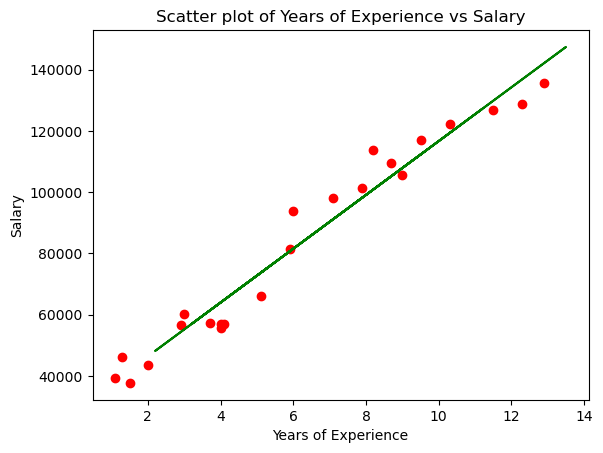

In [53]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_test, y_pred, color='green')
plt.title('Scatter plot of Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# slope

slope ==> y = mx + c

y ==> Dependend variable

m ==> slope

x ==> Independent variable

c ==> Constant

In [54]:
print('Slope is :', model.coef_)
print('Constant is:', model.intercept_)

Slope is : [8788.17872213]
Constant is: 28825.3748460087


In [55]:
df = pd.DataFrame({'Actual value':y_test, 'Predicted value':y_pred})
df

,Actual value,Predicted value
0,121872,121101.251428
1,91738,88584.990156
2,64445,56947.546757
3,139465,147465.787595
4,61111,68372.179096
5,83088,75402.722073
6,54445,56947.546757
7,112635,113191.890578
8,67938,71887.450584
9,39891,48159.368035


In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 4154.705319468662
Mean Squared Error (MSE): 27758971.026975106
R-squared (R²): 0.9714186228542603
